<a href="https://colab.research.google.com/github/dongyoon9802/pythonAnalasys/blob/main/pyhtonAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

현재 지역별 아파트 매매가격과 규모별 아파트 매매가격데이터를 엑셀파일로 불러왔으면 주담대 금리 데이터와, 전세가지수 데이터, 기준금리데이터, 미분양주택 데이터 등을 수집한 상태입니다. 다만 데이터의 형식 자체가 정제되어 있지 않은 데이터들이 많은 관계로 데이터의 정제 작업을 신속하게 처리해야 할 것으로 보여집니다.

In [41]:
from google.colab import drive
drive.mount('/content/drive')
mainlink = '/content/drive/MyDrive/SD/project' #datafile link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np

아래에서 불러오는 파일은 금리 및 미분양 주택수, 전세가 지수 데이터를 가져오는 것입니다.

In [81]:
severalData = pd.read_csv(mainlink+'/복수통계_19193346.csv')
type(severalData)

pandas.core.frame.DataFrame

받아온 데이터를 확인해보니 삭제해야할 컬럼들이 보이네요

In [126]:
severalData.head()


,통계표,항목명1,단위,가중치,변환,2023/04,2023/03,2023/02,2023/01,2022/12,...,2006/01/13,2006/01/12,2006/01/11,2006/01/10,2006/01/09,2006/01/06,2006/01/05,2006/01/04,2006/01/03,2006/01/02
0,1.3.3.2.2. 예금은행 대출금리(잔액 기준),주택담보대출,연리%,NaN,원자료,NaN,4.12,4.05,3.96,3.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.2.1. 소비자물가지수,전세,2020=100,54.0,원자료,105.07,105.2,105.36,105.42,105.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.3.1. 한국은행 기준금리 및 여수신금리,한국은행 기준금리,연%,NaN,원자료,3.50,3.50,3.50,3.50,3.25,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75
3,8.4.5. 미분양주택현황,전국,호,NaN,원자료,NaN,"72,104","75,438","75,359","68,107",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.4.5. 미분양주택현황,수도권,호,NaN,원자료,NaN,"11,034","12,541","12,257","11,035",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


na값의 존재를 확인합니다. 확인결과 21644개의 na값이 존재하네요

In [83]:

print(severalData.isna().values.any())
print(severalData.isna().sum().sum())


True
21649


필요없어보이는 '통계표','가중치','변환' 컬럼들을 제거해줍니다.

In [144]:
#필요없는 column은 제거
severalDataEdit = severalData.drop(columns=['통계표','가중치','변환','단위'])

In [145]:
severalDataEdit.head()

,항목명1,2023/04,2023/03,2023/02,2023/01,2022/12,2022/11,2022/10,2022/09,2022/08,...,2006/01/13,2006/01/12,2006/01/11,2006/01/10,2006/01/09,2006/01/06,2006/01/05,2006/01/04,2006/01/03,2006/01/02
0,주택담보대출,NaN,4.12,4.05,3.96,3.83,3.66,3.52,3.38,3.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,전세,105.07,105.2,105.36,105.42,105.35,105.28,105.13,105.02,104.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,한국은행 기준금리,3.50,3.50,3.50,3.50,3.25,3.25,3.00,2.50,2.50,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75
3,전국,NaN,"72,104","75,438","75,359","68,107","58,027","47,217","41,604","32,722",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,수도권,NaN,"11,034","12,541","12,257","11,035","10,373","7,612","7,813","5,012",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
severalDataEdit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 4521 entries, 항목명1 to 2006/01/02
dtypes: float64(4325), object(196)
memory usage: 212.0+ KB


In [147]:
severalDataEdit.index

RangeIndex(start=0, stop=6, step=1)

na값의 존재 이유가 몇 년도 이전부터는 없는 것으로 보아 데이터들마다 na값을 제거하고 몇 년도 부터 데이터가 존재하는지 확인합니다. 그러기 위해서는 데이터의 종류별로 나눠준 후에 na값을 확인합니다.

In [148]:
#데이터를 주담대금리, 전세가물가지수, 기준금리, 전국미분양주택수, 수조권미분양주택수로 나눕니다.
mortgageLoan = severalDataEdit.iloc[[1]] 
houseRent = severalDataEdit.iloc[[2]] 
baseRate = severalDataEdit.iloc[[3]] 
unsoldNationwide = severalDataEdit.iloc[[4]] 
unsoldRegionwide = severalDataEdit.iloc[[5]] 


주담대 데이터에서 na값이 가장 많이 나온것을 보니 가장 데이터의 기간이 짧네요 아무래도 이 데이터를 기준으로 분석 기준을 세워야 할 듯 싶습니다.

In [149]:
print('주담대 : '+ str(mortgageLoan.isna().sum().sum()))
print('전세가지수 : '+str(houseRent.isna().sum().sum()))
print('기준금리 : '+str(baseRate.isna().sum().sum()))
print('전국미분양주택건수 : '+str(unsoldNationwide.isna().sum().sum()))
print('수도권미분양주택건수 : '+str(unsoldRegionwide.isna().sum().sum()))

주담대 : 4312
전세가지수 : 0
기준금리 : 4325
전국미분양주택건수 : 4325
수도권미분양주택건수 : 4325


na값을 모두 제거해줍니다.

In [150]:
mortgageLoan.dropna(axis=1,inplace=True)
houseRent.dropna(axis=1,inplace=True)
baseRate.dropna(axis=1,inplace=True)
unsoldNationwide.dropna(axis=1,inplace=True)
unsoldRegionwide.dropna(axis=1,inplace=True)


<ipython-input-150-dda54004ec7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgageLoan.dropna(axis=1,inplace=True)
<ipython-input-150-dda54004ec7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseRent.dropna(axis=1,inplace=True)
<ipython-input-150-dda54004ec7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseRate.dropna(axis=1,inplace=True)
<ipython-input-150-dda54004ec7c>:4: SettingWithCopyWarning: 
A value is tryin

깔끔하게 제거가 되었네요

In [151]:
print('주담대 : '+ str(mortgageLoan.isna().sum().sum()))
print('전세가지수 : '+str(houseRent.isna().sum().sum()))
print('기준금리 : '+str(baseRate.isna().sum().sum()))
print('전국미분양주택건수 : '+str(unsoldNationwide.isna().sum().sum()))
print('수도권미분양주택건수 : '+str(unsoldRegionwide.isna().sum().sum()))

주담대 : 0
전세가지수 : 0
기준금리 : 0
전국미분양주택건수 : 0
수도권미분양주택건수 : 0


In [152]:
mortgageLoan.head()

,항목명1,2023/04,2023/03,2023/02,2023/01,2022/12,2022/11,2022/10,2022/09,2022/08,...,2006/10,2006/09,2006/08,2006/07,2006/06,2006/05,2006/04,2006/03,2006/02,2006/01
1,전세,105.07,105.2,105.36,105.42,105.35,105.28,105.13,105.02,104.87,...,70.553,70.344,70.275,70.205,70.134,70.065,69.996,69.856,69.856,69.717


In [153]:
houseRent

,항목명1,2023/04,2023/03,2023/02,2023/01,2022/12,2022/11,2022/10,2022/09,2022/08,...,2006/01/13,2006/01/12,2006/01/11,2006/01/10,2006/01/09,2006/01/06,2006/01/05,2006/01/04,2006/01/03,2006/01/02
2,한국은행 기준금리,3.5,3.50,3.50,3.50,3.25,3.25,3.00,2.50,2.50,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75


데이터의 타입이 정상적이지 않게 object가 들어가있는 경우가 있으므로 해당 부분의 데이터를 float16으로 전환하였습니다.


<Axes: >

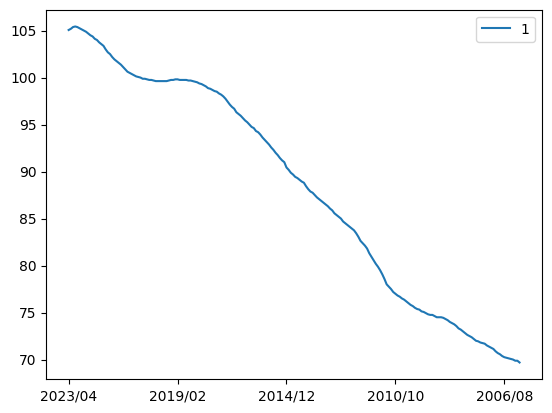

In [182]:
import matplotlib.pyplot as plt

# Transpose the dataframes so that the dates are the indices (for the x-axis)

test = mortgageLoan.transpose().head(5)

# Get all column names except the first one
columns_to_convert = mortgageLoan.columns[1:]

# Convert those columns to float
# df[columns_to_convert] = df[columns_to_convert].astype('float16')

# mortgageLoan.astype()
mortgageLoan[columns_to_convert].astype('float16').transpose().plot()

In [173]:
test

,1
항목명1,전세
2023/04,105.07
2023/03,105.2
2023/02,105.36
2023/01,105.42


In [155]:
apartAvgPriceSize = pd.read_excel(mainlink+'/규모별_아파트_매매_평균가격.xlsx')
apartRentPriceSize = pd.read_excel(mainlink+'/규모별_아파트_전세_평균가격.xlsx')

apartAvgPriceRegi = pd.read_excel(mainlink+'/지역별_아파트_매매_평균가격.xlsx')
apartRentPriceRegi = pd.read_excel(mainlink+'/지역별_아파트_전세_평균가격.xlsx')

pirdata = pd.read_excel(mainlink+'/pirData.xlsx')
compositeIndex = pd.read_excel(mainlink+'/경기종합지수.xlsx')
cunstructure = pd.read_excel(mainlink+'/건설동향.xlsx')



In [156]:
pirdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      7 non-null      object 
 1   2006    7 non-null      float64
 2   2008    7 non-null      float64
 3   2010    7 non-null      float64
 4   2012    7 non-null      float64
 5   2014    7 non-null      float64
 6   2016    7 non-null      float64
 7   2017    7 non-null      float64
 8   2018    7 non-null      float64
 9   2019    7 non-null      float64
 10  2020    7 non-null      float64
 11  2021    7 non-null      float64
dtypes: float64(11), object(1)
memory usage: 800.0+ bytes


In [157]:
pirdata.head()

,년도,2006,2008,2010,2012,2014,2016,2017,2018,2019,2020,2021
0,전체,4.2,4.3,4.3,5.1,4.7,5.6,5.6,5.5,5.4,5.5,6.7
1,수도권,5.7,6.9,6.9,6.7,6.9,6.7,6.7,6.9,6.8,8.0,10.1
2,광역시 등,4.1,3.3,3.5,5.0,4.7,5.3,5.5,5.6,5.5,6.0,7.1
3,도지역,3.3,3.0,2.9,3.6,4.2,4.0,4.0,3.6,3.6,3.9,4.2
4,하위(1-4분위),6.3,6.4,6.1,7.5,8.3,9.8,8.3,9.0,8.9,8.3,9.4


In [158]:
compositeIndex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 208 entries, Unnamed: 0 to 202303월
dtypes: float64(207), object(1)
memory usage: 3.4+ KB


In [159]:
compositeIndex.head()

,Unnamed: 0,200601월,200602월,200603월,200604월,200605월,200606월,200607월,200608월,200609월,...,202206월,202207월,202208월,202209월,202210월,202211월,202212월,202301월,202302월,202303월
0,동행지수순환변동치,99.7,99.6,99.8,99.7,100.0,99.8,99.1,99.1,99.4,...,100.4,100.6,100.9,100.8,100.7,100.1,99.4,99.0,99.3,99.9
1,선행지수순환변동치,101.0,101.1,101.0,100.8,100.8,100.4,99.9,99.6,100.1,...,100.3,100.1,99.9,99.8,99.8,99.5,99.1,98.8,98.5,98.2


In [160]:
cunstructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3 non-null      object 
 1   2006        3 non-null      float64
 2   2007        3 non-null      float64
 3   2008        3 non-null      float64
 4   2009        3 non-null      float64
 5   2010        3 non-null      float64
 6   2011        3 non-null      float64
 7   2012        3 non-null      float64
 8   2013        3 non-null      float64
 9   2014        3 non-null      float64
 10  2015        3 non-null      float64
 11  2016        3 non-null      float64
 12  2017        3 non-null      float64
 13  2018        3 non-null      float64
 14  2019        3 non-null      float64
 15  2020        3 non-null      float64
 16  2021        3 non-null      float64
 17  2022        3 non-null      float64
dtypes: float64(17), object(1)
memory usage: 560.0+ bytes


In [122]:
cunstructure.head()

,Unnamed: 0,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,건설투자(국내총생산),0.7,1.5,-2.7,3.6,-3.7,-2.8,-3.5,6.3,1.4,6.9,10.0,7.3,-4.6,-2.5,-0.4,-1.6,-3.5
1,국내건설수주,9.0,23.6,-7.6,5.0,-17.7,6.1,-6.2,-12.9,16.3,48.4,8.1,-1.7,0.2,7.6,16.6,9.2,10.5
2,건축허가면적,19.5,13.3,-20.1,-12.9,19.3,9.9,-0.5,-7.3,11.2,34.3,-5.7,-4.0,-6.3,-10.4,2.1,17.6,4.9


In [112]:
apartAvgPriceSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 209 entries, 지 역 to 2023년 03월
dtypes: float64(207), object(2)
memory usage: 32.8+ KB


In [113]:
apartAvgPriceSize.head()

,지 역,규모,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,2006년 08월,...,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월,2023년 01월,2023년 02월,2023년 03월
0,전국,초소형,246.172829,195.422991,230.083410,225.324228,208.896001,182.631381,177.093836,197.174376,...,351.569947,332.912367,346.396266,330.207327,332.949525,316.886939,344.971085,386.693348,427.188591,397.297931
1,전국,소형,235.808813,196.580956,215.303024,208.748593,204.834399,188.376758,188.666225,200.810338,...,350.616598,332.266288,335.557222,329.089179,319.156325,354.424051,381.594834,452.405307,497.738400,476.073581
2,전국,중소형,298.050384,257.933826,274.675950,261.913230,253.093019,225.661198,227.079637,240.063883,...,434.303058,425.908222,420.760579,410.044272,415.469293,454.835611,471.974048,510.935557,533.276235,524.571724
3,전국,중대형,415.210816,356.822515,382.712219,337.352499,314.768653,283.174126,271.142818,288.609114,...,554.092623,513.663490,518.927511,493.637246,501.633129,524.391361,544.558879,563.018713,603.591473,598.982218
4,전국,대형,519.110232,455.332878,474.450173,401.216299,337.944042,295.010419,299.187722,321.620515,...,694.521305,613.764135,544.170268,603.066274,549.379990,550.528650,530.255792,622.231016,589.194527,657.795239
